## EDA TUTORIAL

In [1]:
import pandas as pd         
import numpy as np          
import matplotlib.pyplot as plt         
import seaborn as  sns    

In [2]:
df = pd.read_csv('/Users/genevievechin/Desktop/Netflix_Userbase.csv') 

In [3]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
df.tail(10)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2490,2491,Premium,13,18-07-22,11-07-23,France,41,Female,Smartphone,1 Month
2491,2492,Basic,14,19-07-22,12-07-23,Brazil,29,Female,Laptop,1 Month
2492,2493,Standard,11,20-07-22,11-07-23,Mexico,33,Male,Smart TV,1 Month
2493,2494,Premium,12,21-07-22,15-07-23,Spain,36,Male,Smart TV,1 Month
2494,2495,Basic,15,23-07-22,12-07-23,Italy,43,Female,Laptop,1 Month
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


In [5]:
# to see what types of subscriptions are avail
print(df['Subscription Type'].unique())

['Basic' 'Premium' 'Standard']


In [23]:
# monthly subscription? yearly? 
print(df['Plan Duration'].unique())

['1 Month']


In [6]:
# to see diff subscription prices
print(df['Monthly Revenue'].unique())

[10 15 12 13 11 14]


In [7]:
# which countries are we looking at?
print(df['Country'].unique())

['United States' 'Canada' 'United Kingdom' 'Australia' 'Germany' 'France'
 'Brazil' 'Mexico' 'Spain' 'Italy']


In [8]:
df.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [10]:
# number of rows vs columns
df.shape

(2500, 10)

In [13]:
pd.options.display.float_format = '{:.3f}'.format # 3dp only 
df.describe()

,User ID,Monthly Revenue,Age
count,2500.000,2500.000,2500.000
mean,1250.500,12.508,38.796
std,721.832,1.687,7.172
min,1.000,10.000,26.000
25%,625.750,11.000,32.000
50%,1250.500,12.000,39.000
75%,1875.250,14.000,45.000
max,2500.000,15.000,51.000


In [14]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [15]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


so we have no null or duplicated data!


In [29]:
#converting ['date'] into date-time format => more uniform data => easier plotting => better analysis 
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

## Analysing our Netflix Data!


### Sales per Month

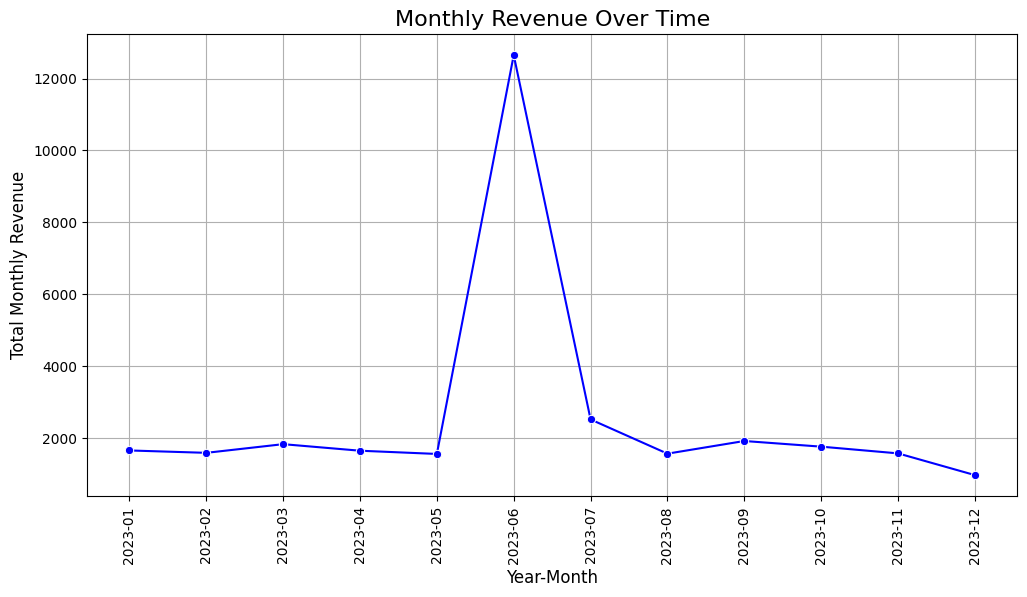

In [53]:
# Group by 'Year-Month' and sum the revenue
monthly_revenue = df.groupby('Year-Month')['Monthly Revenue'].sum().reset_index()

# Convert 'Year-Month' back to string for plotting purposes
monthly_revenue['Year-Month'] = monthly_revenue['Year-Month'].astype(str)

# Plotting the line chart for revenue over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year-Month', y='Monthly Revenue', data=monthly_revenue, marker='o', color='b')
plt.title('Monthly Revenue Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Monthly Revenue', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


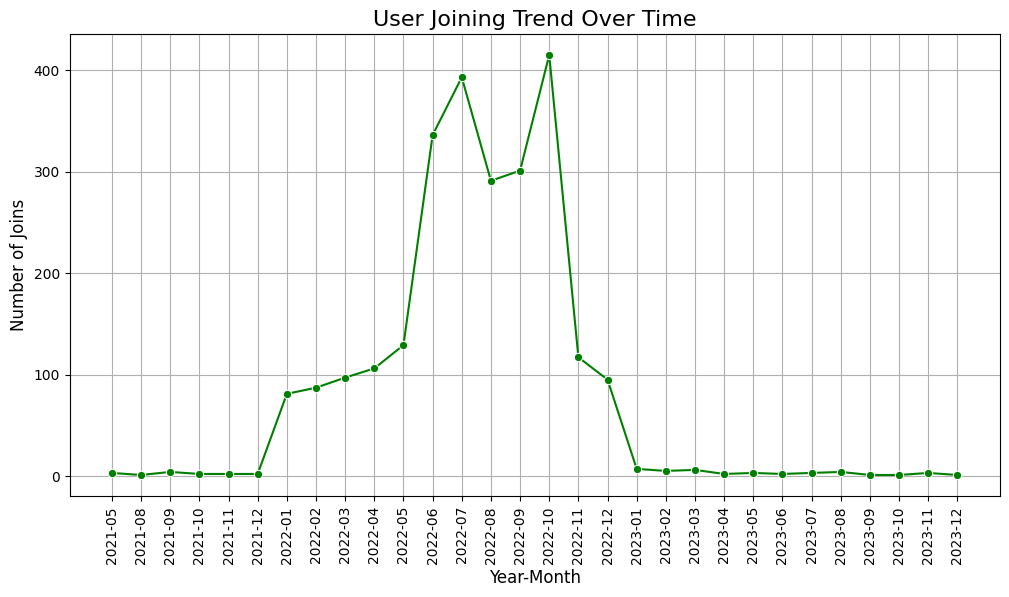

In [52]:
# Group by 'Year-Month Join' and count the number of joins
monthly_joins = df.groupby('Year-Month Join').size().reset_index(name='Number of Joins')

# Convert 'Year-Month Join' back to string for plotting purposes
monthly_joins['Year-Month Join'] = monthly_joins['Year-Month Join'].astype(str)

# Plotting the line chart for user joining over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year-Month Join', y='Number of Joins', data=monthly_joins, marker='o', color='g')
plt.title('User Joining Trend Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Joins', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


### Most Popular Subscription Type

/var/folders/wg/91flyts96kd2tvg4khkmh6400000gn/T/ipykernel_11896/1298383433.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subscription_counts.index, y=subscription_counts.values, palette="viridis")


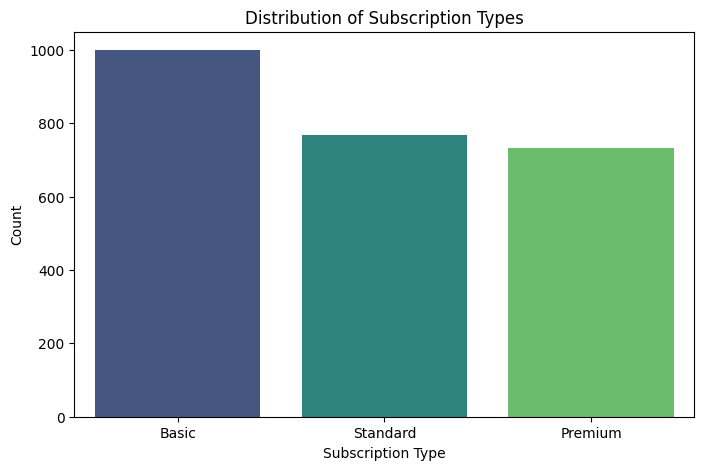

In [20]:


# Count of each subscription type
subscription_counts = df['Subscription Type'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=subscription_counts.index, y=subscription_counts.values, palette="viridis")
plt.title('Distribution of Subscription Types')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()


### Gender vs Subscription Type
Which Gender prefers which Subscription -> how can we market our product?

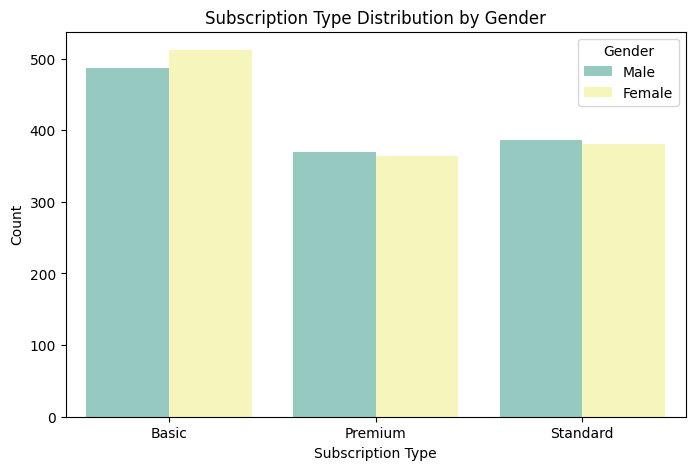

In [21]:
# Count plot of subscription type by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Subscription Type', hue='Gender', data=df, palette='Set3')
plt.title('Subscription Type Distribution by Gender')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()


### Which Country uses Netflix more? 

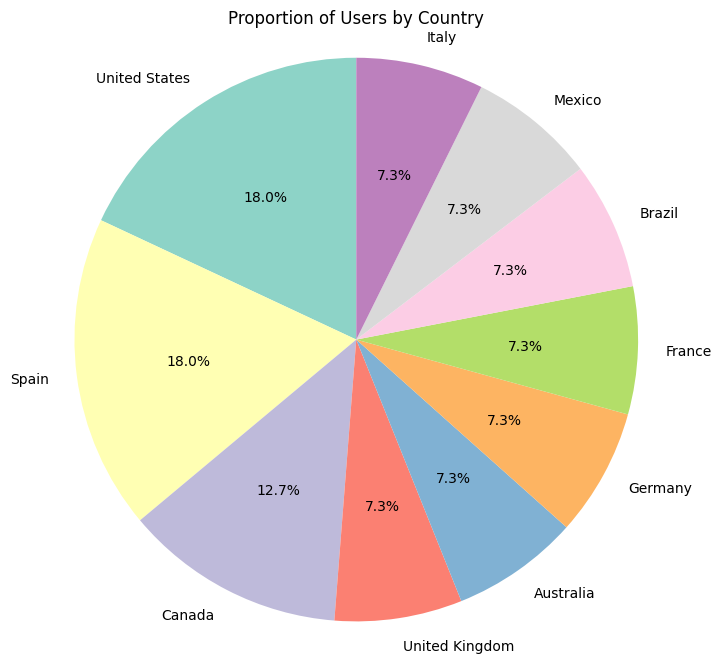

In [25]:
# Count the number of users per country
country_counts = df['Country'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(country_counts)))

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Users by Country')
plt.axis('equal')  
plt.show()


OR 

/var/folders/wg/91flyts96kd2tvg4khkmh6400000gn/T/ipykernel_11896/312994794.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='User Count', data=sum_users_by_country, palette='Blues_d')


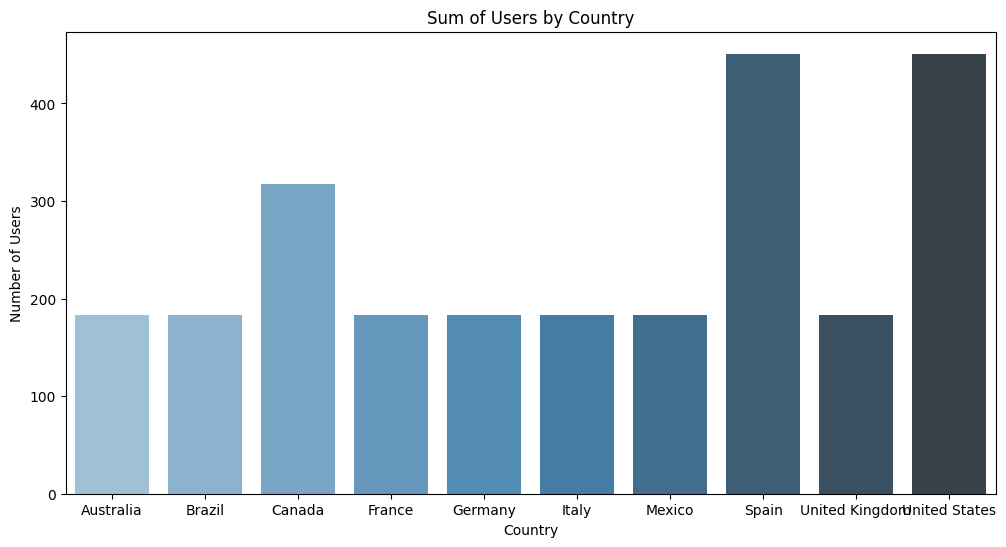

In [33]:
sum_users_by_country = df.groupby('Country')['User ID'].count().reset_index()
sum_users_by_country.rename(columns={'User ID': 'User Count'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='User Count', data=sum_users_by_country, palette='Blues_d')
plt.title('Sum of Users by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.show()

### Now to see how much we earn in Revenue

#### How much is our TOTAL REVENUE ?

In [47]:
# Assuming df is your DataFrame containing the relevant data
total_revenue = df['Monthly Revenue'].sum()

print(f'Total Revenue: ${total_revenue:.2f}')


Total Revenue: $31271.00


#### Monthly Revenue

In [50]:
# Group by 'Year-Month' and sum the revenue
monthly_revenue = df.groupby('Year-Month')['Monthly Revenue'].sum().reset_index()

# Display the monthly revenue
print(monthly_revenue)


   Year-Month  Monthly Revenue
0     2023-01             1658
1     2023-02             1592
2     2023-03             1833
3     2023-04             1651
4     2023-05             1561
5     2023-06            12651
6     2023-07             2521
7     2023-08             1569
8     2023-09             1921
9     2023-10             1764
10    2023-11             1577
11    2023-12              973


#### Revenue per Subscription Pricing 
in text table OR bar chart

In [34]:
plt.figure(figsize=(8,8))
revenues = df['Monthly Revenue'].value_counts().reset_index()

revenues

,Monthly Revenue,count
0,12,455
1,14,431
2,13,418
3,10,409
4,15,399
5,11,388


<Figure size 800x800 with 0 Axes>

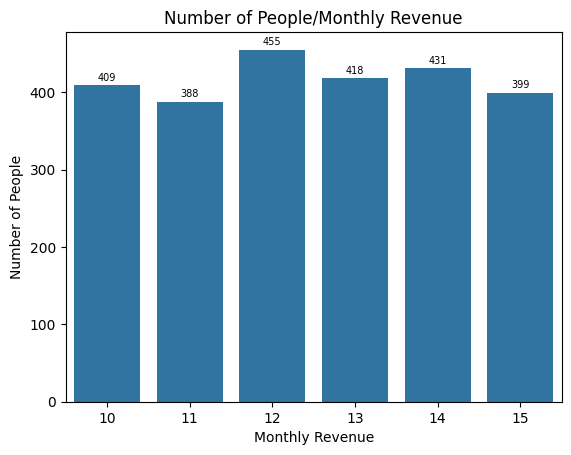

In [43]:
sns.barplot(
    x='Monthly Revenue',
    y='count',
    data=revenues
)

barplot = sns.barplot()

plt.xlabel('Monthly Revenue')
plt.ylabel('Number of People')
plt.title('Number of People/Monthly Revenue')
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}',  # Annotate with the height value
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Position on top of the bar
                     ha='center', va='bottom',  # Center the text horizontally and place it just above the bar
                     fontsize=7, color='black',  # Set font size and color
                     xytext=(0, 2),  # Offset the text slightly above the bar
                     textcoords='offset points')
    
plt.show()

In [44]:
# Ensure 'Last Payment Date' is in datetime format
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

# Create a new column for Year-Month (YYYY-MM)
df['Year-Month'] = df['Last Payment Date'].dt.to_period('M')

# Group by 'Year-Month' and sum the revenue
monthly_revenue = df.groupby('Year-Month')['Monthly Revenue'].sum().reset_index()

# Display the monthly revenue
print(monthly_revenue)


   Year-Month  Monthly Revenue
0     2023-01             1658
1     2023-02             1592
2     2023-03             1833
3     2023-04             1651
4     2023-05             1561
5     2023-06            12651
6     2023-07             2521
7     2023-08             1569
8     2023-09             1921
9     2023-10             1764
10    2023-11             1577
11    2023-12              973


In [45]:

total_revenue = df['Monthly Revenue'].sum()

print(f'Total Revenue: ${total_revenue:.2f}')


Total Revenue: $31271.00
